# Work on Sample data from League of Legends

In [2]:
import pandas as pd
import json

file = '../raw_data/games_dump.json'
with open(file) as data_file:    
    data = json.load(data_file) 
data = data[:]
len(data)

18254

In [3]:
data[0]

{'id': 2,
 'start': '2011-06-18T09:45:00+00:00',
 'patch': 'None.None',
 'winner': 'BLUE',
 'duration': 1777,
 'video': 'https://www.youtube.com/watch?v=98OWfh2OFPc',
 'teams': {'BLUE': {'name': 'Fnatic',
   'total_turret_kills': 0,
   'total_inhibitor_kills': None,
   'total_rift_herald_kills': 0,
   'total_dragon_kills': 0,
   'total_baron_kills': 0,
   'players': [{'name': 'Wewillfailer',
     'champion_name': 'Malzahar',
     'champion_id': 90,
     'gd_15': None,
     'kills_assists_15': 0,
     'deaths_15': 0,
     'gold_share_post_15': None,
     'damage_share': None,
     'jungle_proximity': None,
     'support_proximity': None,
     'total_gold': None,
     'total_cs': None,
     'total_kills': None,
     'total_monster_kills': None,
     'total_assists': None,
     'total_deaths': None,
     'total_vision_score': None,
     'total_damage_taken': None,
     'total_damage_dealt': None,
     'trueskill_sigma': 8.333333,
     'trueskill_mu': 20.0,
     'win': True,
     'side': '

In [4]:
data[0].keys()

dict_keys(['id', 'start', 'patch', 'winner', 'duration', 'video', 'teams', 'picks_bans'])

In [5]:
data[0]['teams'].keys()

dict_keys(['BLUE', 'RED'])

In [6]:
data[0]['teams']['BLUE'].keys()

dict_keys(['name', 'total_turret_kills', 'total_inhibitor_kills', 'total_rift_herald_kills', 'total_dragon_kills', 'total_baron_kills', 'players'])

In [7]:
data[0]['teams']['BLUE']['players'][0].keys()

dict_keys(['name', 'champion_name', 'champion_id', 'gd_15', 'kills_assists_15', 'deaths_15', 'gold_share_post_15', 'damage_share', 'jungle_proximity', 'support_proximity', 'total_gold', 'total_cs', 'total_kills', 'total_monster_kills', 'total_assists', 'total_deaths', 'total_vision_score', 'total_damage_taken', 'total_damage_dealt', 'trueskill_sigma', 'trueskill_mu', 'win', 'side'])

### To remove
video, team_name, 'total_monster_kills', 'damage_share', 'total_vision_score'

## Normalize the JSON file into a Pandas DataFrame

Data is structured in a JSON structure that is inconvinient for data analysis. Converting nested JSON structures to Pandas DataFrames using https://medium.com/swlh/converting-nested-json-structures-to-pandas-dataframes-e8106c59976e

In [8]:
#Normalize the teams input
df_normalized_teams = pd.json_normalize(data)
df_normalized_teams.head()

,id,start,patch,winner,duration,video,picks_bans,teams.BLUE.name,teams.BLUE.total_turret_kills,teams.BLUE.total_inhibitor_kills,...,teams.BLUE.total_dragon_kills,teams.BLUE.total_baron_kills,teams.BLUE.players,teams.RED.name,teams.RED.total_turret_kills,teams.RED.total_inhibitor_kills,teams.RED.total_rift_herald_kills,teams.RED.total_dragon_kills,teams.RED.total_baron_kills,teams.RED.players
0,2,2011-06-18T09:45:00+00:00,None.None,BLUE,1777.0,https://www.youtube.com/watch?v=98OWfh2OFPc,[],Fnatic,0.0,NaN,...,0.0,0.0,"[{'name': 'Wewillfailer', 'champion_name': 'Ma...",None,0.0,NaN,0.0,0.0,0.0,"[{'name': None, 'champion_name': 'Karthus', 'c..."
1,4,2011-06-18T11:00:00+00:00,None.None,BLUE,1735.0,https://www.youtube.com/watch?v=bEMJx-g0yk8,[],Epik Gamer,0.0,NaN,...,0.0,0.0,"[{'name': 'Westrice', 'champion_name': 'Corki'...",None,0.0,NaN,0.0,0.0,0.0,"[{'name': None, 'champion_name': 'Malzahar', '..."
2,5,2011-06-18T12:15:00+00:00,None.None,BLUE,1453.0,https://www.youtube.com/watch?v=5jXjps7DMD8,[],None,0.0,NaN,...,0.0,0.0,"[{'name': 'SOAZ', 'champion_name': 'Nidalee', ...",None,0.0,NaN,0.0,0.0,0.0,"[{'name': None, 'champion_name': 'Malzahar', '..."
3,7,2011-06-18T14:30:00+00:00,None.None,RED,2260.0,https://www.youtube.com/watch?v=Y5LunOkh738,[],TSM,0.0,NaN,...,0.0,0.0,"[{'name': 'The Rain Man', 'champion_name': 'Ch...",None,0.0,NaN,0.0,0.0,0.0,"[{'name': None, 'champion_name': 'Nocturne', '..."
4,9,2011-06-18T16:00:00+00:00,None.None,BLUE,2185.0,https://www.youtube.com/watch?v=7qiyiYC6XUs,[],None,0.0,NaN,...,0.0,0.0,"[{'name': 'Kev1n', 'champion_name': 'Nidalee',...",None,0.0,NaN,0.0,0.0,0.0,"[{'name': None, 'champion_name': 'Nunu & Willu..."


In [9]:
df_normalized_teams.drop('video', axis=1, inplace = True)

In [10]:
df_normalized_teams.drop(['teams.BLUE.name', 'teams.RED.name'], axis=1, inplace=True)

In [11]:
df_normalized_teams['teams.BLUE.players'].explode()

0        {'name': 'Wewillfailer', 'champion_name': 'Mal...
0        {'name': 'Cyanide', 'champion_name': 'Nunu & W...
0        {'name': 'Shushei', 'champion_name': 'Alistar'...
0        {'name': 'LaMiaZeaLoT', 'champion_name': 'Cork...
0        {'name': 'Mellisan', 'champion_name': 'Janna',...
                               ...                        
18253    {'name': 'Flaai', 'champion_name': 'Sett', 'ch...
18253    {'name': 'Adampongo', 'champion_name': 'Jarvan...
18253    {'name': 'Necropolisak', 'champion_name': 'Ryz...
18253    {'name': 'Kneza', 'champion_name': 'Lucian', '...
18253    {'name': 'Phenix', 'champion_name': 'Lulu', 'c...
Name: teams.BLUE.players, Length: 91270, dtype: object

In [12]:
df_normalized_BLUE = pd.json_normalize(df_normalized_teams['teams.BLUE.players'].explode())
df_normalized_BLUE

,name,champion_name,champion_id,gd_15,kills_assists_15,deaths_15,gold_share_post_15,damage_share,jungle_proximity,support_proximity,...,total_monster_kills,total_assists,total_deaths,total_vision_score,total_damage_taken,total_damage_dealt,trueskill_sigma,trueskill_mu,win,side
0,Wewillfailer,Malzahar,90,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE
1,Cyanide,Nunu & Willump,20,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE
2,Shushei,Alistar,12,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE
3,LaMiaZeaLoT,Corki,42,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE
4,Mellisan,Janna,40,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91265,Flaai,Sett,875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,6.0,4.0,51.0,28321.0,115423.0,4.829746,34.512520,True,BLUE
91266,Adampongo,Jarvan IV,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.0,14.0,2.0,46.0,32735.0,170233.0,6.328289,25.607258,True,BLUE
91267,Necropolisak,Ryze,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.0,4.0,2.0,28.0,15094.0,173262.0,5.523678,28.171322,True,BLUE
91268,Kneza,Lucian,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,5.0,0.0,62.0,19019.0,305263.0,3.868226,30.766910,True,BLUE


In [13]:
df_normalized_RED = pd.json_normalize(df_normalized_teams['teams.RED.players'].explode(), )
df_normalized_RED

,name,champion_name,champion_id,gd_15,kills_assists_15,deaths_15,gold_share_post_15,damage_share,jungle_proximity,support_proximity,...,total_monster_kills,total_assists,total_deaths,total_vision_score,total_damage_taken,total_damage_dealt,trueskill_sigma,trueskill_mu,win,side
0,None,Karthus,30,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED
1,None,Amumu,32,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED
2,None,Twisted Fate,4,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED
3,None,Garen,86,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED
4,None,Taric,44,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91265,Kulvas,Camille,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,4.0,5.0,45.0,27259.0,169260.0,3.942188,32.053300,False,RED
91266,Hiro (Nguyên Đại Hải),Miss Fortune,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,0.0,5.0,40.0,12090.0,177612.0,3.647015,26.539326,False,RED
91267,Jackisek,LeBlanc,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,7.0,3.0,38.0,23435.0,125024.0,4.037007,32.472115,False,RED
91268,Smarty,Nami,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,9.0,6.0,82.0,11427.0,11595.0,4.107074,38.463030,False,RED


### Get the game id to properly analyze the data

We have two different dataframes for team Blue and team Red, we can merge them on the game id. This will also be useful when we want to come back for the y parameter! 

In [14]:
# Extract the index corresponding to the game id 
get_index = df_normalized_teams['id'].tolist()
get_index[:10], len(get_index)

([2, 4, 5, 7, 9, 12, 38, 39, 41, 43], 18254)

In [15]:
import numpy as np

index_preproc = np.asarray([[index] * 5 for index in get_index])
index_preproc.shape

(18254, 5)

In [16]:
#reshape the array to 1D
## 5 is because there are 5 players per team
index_teams = index_preproc.reshape(len(df_normalized_teams) * 5).tolist()
index_teams[0:12]

[2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 5, 5]

In [17]:
df_normalized_RED['index_teams'] = index_teams
df_normalized_BLUE['index_teams'] = index_teams

In [18]:
df_normalized_BLUE

,name,champion_name,champion_id,gd_15,kills_assists_15,deaths_15,gold_share_post_15,damage_share,jungle_proximity,support_proximity,...,total_assists,total_deaths,total_vision_score,total_damage_taken,total_damage_dealt,trueskill_sigma,trueskill_mu,win,side,index_teams
0,Wewillfailer,Malzahar,90,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE,2
1,Cyanide,Nunu & Willump,20,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE,2
2,Shushei,Alistar,12,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE,2
3,LaMiaZeaLoT,Corki,42,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE,2
4,Mellisan,Janna,40,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91265,Flaai,Sett,875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,4.0,51.0,28321.0,115423.0,4.829746,34.512520,True,BLUE,19525
91266,Adampongo,Jarvan IV,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,2.0,46.0,32735.0,170233.0,6.328289,25.607258,True,BLUE,19525
91267,Necropolisak,Ryze,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,28.0,15094.0,173262.0,5.523678,28.171322,True,BLUE,19525
91268,Kneza,Lucian,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,0.0,62.0,19019.0,305263.0,3.868226,30.766910,True,BLUE,19525


In [19]:
df_normalized_RED

,name,champion_name,champion_id,gd_15,kills_assists_15,deaths_15,gold_share_post_15,damage_share,jungle_proximity,support_proximity,...,total_assists,total_deaths,total_vision_score,total_damage_taken,total_damage_dealt,trueskill_sigma,trueskill_mu,win,side,index_teams
0,None,Karthus,30,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED,2
1,None,Amumu,32,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED,2
2,None,Twisted Fate,4,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED,2
3,None,Garen,86,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED,2
4,None,Taric,44,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91265,Kulvas,Camille,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,5.0,45.0,27259.0,169260.0,3.942188,32.053300,False,RED,19525
91266,Hiro (Nguyên Đại Hải),Miss Fortune,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5.0,40.0,12090.0,177612.0,3.647015,26.539326,False,RED,19525
91267,Jackisek,LeBlanc,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,3.0,38.0,23435.0,125024.0,4.037007,32.472115,False,RED,19525
91268,Smarty,Nami,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,6.0,82.0,11427.0,11595.0,4.107074,38.463030,False,RED,19525


There are 3 created dataframes important in this section:
```df_normalized_teams, df_normalized_BLUE and df_normalized_RED```

# Preprocess the data

## Simple Impute the data

In [20]:
df_normalized_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18254 entries, 0 to 18253
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  18254 non-null  int64  
 1   start                               18254 non-null  object 
 2   patch                               18254 non-null  object 
 3   winner                              18254 non-null  object 
 4   duration                            18248 non-null  float64
 5   picks_bans                          18254 non-null  object 
 6   teams.BLUE.total_turret_kills       18248 non-null  float64
 7   teams.BLUE.total_inhibitor_kills    11295 non-null  float64
 8   teams.BLUE.total_rift_herald_kills  15761 non-null  float64
 9   teams.BLUE.total_dragon_kills       18248 non-null  float64
 10  teams.BLUE.total_baron_kills        18248 non-null  float64
 11  teams.BLUE.players                  18254

### Get the year the game was played

In [23]:
df_normalized_teams['start'] = pd.to_datetime(df_normalized_teams['start'])
df_normalized_teams['year'] = pd.DatetimeIndex(df_normalized_teams['start']).year
games_year = df_normalized_teams.year.unique()
games_year

array([2011, 2012, 2013, 2021, 2015, 2016, 2014])

In [26]:
#games played every year
for year in games_year:
    N_games = len(df_normalized_teams[df_normalized_teams['year'] == year])
    print(f'Number of games in {year}: {N_games}')

Number of games in 2011: 28
Number of games in 2012: 428
Number of games in 2013: 1303
Number of games in 2021: 14003
Number of games in 2015: 1544
Number of games in 2016: 204
Number of games in 2014: 744


In [58]:
#Use games only from 2021 and other years when we get the data
def choose_years_to_work(df, *args):
    years_dict = {}
    for year in args:
        years_dict[year] = df[df['year'] == year]
    return pd.concat(years_dict).droplevel(0)

df_data_by_year = choose_years_to_work(df_normalized_teams, 2021)
df_data_by_year

,id,patch,winner,duration,picks_bans,teams.BLUE.total_turret_kills,teams.BLUE.total_inhibitor_kills,teams.BLUE.total_rift_herald_kills,teams.BLUE.total_dragon_kills,teams.BLUE.total_baron_kills,teams.BLUE.players,teams.RED.total_turret_kills,teams.RED.total_inhibitor_kills,teams.RED.total_rift_herald_kills,teams.RED.total_dragon_kills,teams.RED.total_baron_kills,teams.RED.players,year
22,19158,11.19,BLUE,NaN,[],NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Jayce', 'cha...",NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Ornn', 'cham...",2021
135,19162,11.19,BLUE,NaN,[],NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Jayce', 'cha...",NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Ornn', 'cham...",2021
161,19166,11.19,BLUE,NaN,[],NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Jayce', 'cha...",NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Ornn', 'cham...",2021
225,19170,11.19,BLUE,NaN,[],NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Jayce', 'cha...",NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Ornn', 'cham...",2021
238,1297,11.1,RED,1666.0,[],2.0,0.0,2.0,0.0,0.0,"[{'name': 'RJX ZaFiR', 'champion_name': 'Thres...",10.0,2.0,0.0,4.0,1.0,"[{'name': 'CBI SneakyLemon', 'champion_name': ...",2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18249,19521,11.21,BLUE,1576.0,"[{'ban': True, 'champion_id': 0, 'champion_nam...",10.0,1.0,2.0,2.0,1.0,"[{'name': 'Tasaa', 'champion_name': 'Mordekais...",1.0,0.0,0.0,2.0,0.0,"[{'name': 'Dejvos', 'champion_name': 'Nautilus...",2021
18250,19522,11.21,BLUE,2299.0,"[{'ban': True, 'champion_id': 0, 'champion_nam...",9.0,1.0,2.0,4.0,1.0,"[{'name': 'Wapode', 'champion_name': 'Ezreal',...",3.0,0.0,0.0,2.0,1.0,"[{'name': 'Pepi (Miro Rauten)', 'champion_name...",2021
18251,19523,11.21,RED,1467.0,"[{'ban': True, 'champion_id': 0, 'champion_nam...",5.0,0.0,1.0,1.0,0.0,"[{'name': 'Hachi (Davy de Graaf)', 'champion_n...",8.0,1.0,1.0,2.0,1.0,"[{'name': 'Welcom', 'champion_name': 'Gwen', '...",2021
18252,19524,11.21,RED,2053.0,"[{'ban': True, 'champion_id': 0, 'champion_nam...",7.0,2.0,2.0,1.0,0.0,"[{'name': 'Trungi', 'champion_name': 'Camille'...",9.0,1.0,0.0,4.0,2.0,"[{'name': 'Deffaren', 'champion_name': 'Braum'...",2021


In [ ]:
# We don't need the rest of the date so we can drop the data
df_data_by_year.drop('start', axis=1, inplace=True)

In [60]:
winner = [1 if value == 'BLUE' else 0 for value in df_data_by_year.winner]
len(winner), sum(winner)

(14003, 7451)

In [61]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit(df_data_by_year.winner).transform(df_data_by_year.winner)

### Simple Impute the Team Data

Check for null data for the join teams dataframe (previously df_normalized_teams)

In [65]:
#Number of missing values for each feature
df_data_by_year.isnull().sum().sort_values(ascending=False)

teams.RED.total_inhibitor_kills       3315
teams.BLUE.total_inhibitor_kills      3315
teams.BLUE.total_rift_herald_kills    2027
teams.RED.total_rift_herald_kills     2027
teams.BLUE.total_baron_kills             6
duration                                 6
teams.RED.total_baron_kills              6
teams.BLUE.total_turret_kills            6
teams.BLUE.total_dragon_kills            6
teams.RED.total_dragon_kills             6
teams.RED.total_turret_kills             6
teams.RED.players                        0
id                                       0
teams.BLUE.players                       0
patch                                    0
picks_bans                               0
winner                                   0
year                                     0
dtype: int64

In [67]:
#Percentage of missing values for each feature
null_data = df_data_by_year.isnull().sum().sort_values(ascending=False)/len(df_data_by_year)
null_data

teams.RED.total_inhibitor_kills       0.236735
teams.BLUE.total_inhibitor_kills      0.236735
teams.BLUE.total_rift_herald_kills    0.144755
teams.RED.total_rift_herald_kills     0.144755
teams.BLUE.total_baron_kills          0.000428
duration                              0.000428
teams.RED.total_baron_kills           0.000428
teams.BLUE.total_turret_kills         0.000428
teams.BLUE.total_dragon_kills         0.000428
teams.RED.total_dragon_kills          0.000428
teams.RED.total_turret_kills          0.000428
teams.RED.players                     0.000000
id                                    0.000000
teams.BLUE.players                    0.000000
patch                                 0.000000
picks_bans                            0.000000
winner                                0.000000
year                                  0.000000
dtype: float64

In [76]:
null_data.keys()[0], null_data[0]

('teams.RED.total_inhibitor_kills', 0.23673498536027995)

In [98]:
#Use a simple imputer to replace the missing values
from sklearn.impute import SimpleImputer

for i, value in enumerate(null_data):
    if value != 0:
        feature = null_data.keys()[i]
        imputer = SimpleImputer(strategy="mean")
        imputer.fit(df_data_by_year[[feature]])
        df_data_by_year[[feature]] = imputer.transform(df_data_by_year[[feature]])
        print(f'{feature} null values were replaced with {imputer.statistics_}')

teams.RED.total_inhibitor_kills null values were replaced with [0.84384356]
teams.BLUE.total_inhibitor_kills null values were replaced with [0.98727545]
teams.BLUE.total_rift_herald_kills null values were replaced with [1.14529058]
teams.RED.total_rift_herald_kills null values were replaced with [0.78390114]
teams.BLUE.total_baron_kills null values were replaced with [0.67564478]
duration null values were replaced with [1882.39787097]
teams.RED.total_baron_kills null values were replaced with [0.65128242]
teams.BLUE.total_turret_kills null values were replaced with [6.13581482]
teams.BLUE.total_dragon_kills null values were replaced with [2.20161463]
teams.RED.total_dragon_kills null values were replaced with [2.31449596]
teams.RED.total_turret_kills null values were replaced with [5.52711295]


In [99]:
df_data_by_year.isnull().sum().sort_values(ascending=False)/len(df_data_by_year)

id                                    0.0
patch                                 0.0
teams.RED.players                     0.0
teams.RED.total_baron_kills           0.0
teams.RED.total_dragon_kills          0.0
teams.RED.total_rift_herald_kills     0.0
teams.RED.total_inhibitor_kills       0.0
teams.RED.total_turret_kills          0.0
teams.BLUE.players                    0.0
teams.BLUE.total_baron_kills          0.0
teams.BLUE.total_dragon_kills         0.0
teams.BLUE.total_rift_herald_kills    0.0
teams.BLUE.total_inhibitor_kills      0.0
teams.BLUE.total_turret_kills         0.0
picks_bans                            0.0
duration                              0.0
winner                                0.0
year                                  0.0
dtype: float64

### SimpleImpute the players data

In [123]:
df_normalized_BLUE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91270 entries, 0 to 91269
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   champion_name        91264 non-null  object 
 1   champion_id          91270 non-null  int64  
 2   gd_15                91270 non-null  float64
 3   kills_assists_15     91270 non-null  float64
 4   deaths_15            91270 non-null  float64
 5   gold_share_post_15   91270 non-null  float64
 6   damage_share         91270 non-null  float64
 7   jungle_proximity     91270 non-null  float64
 8   support_proximity    91270 non-null  float64
 9   total_gold           91270 non-null  float64
 10  total_cs             91270 non-null  float64
 11  total_kills          91270 non-null  float64
 12  total_monster_kills  91270 non-null  float64
 13  total_assists        91270 non-null  float64
 14  total_deaths         91270 non-null  float64
 15  total_vision_score   91270 non-null 

In [124]:
df_normalized_BLUE.isnull().sum().sort_values(ascending=False)/len(df_normalized_BLUE), df_normalized_RED.isnull().sum().sort_values(ascending=False)/len(df_normalized_RED)

(champion_name          0.000066
 total_monster_kills    0.000000
 side                   0.000000
 win                    0.000000
 trueskill_mu           0.000000
 trueskill_sigma        0.000000
 total_damage_dealt     0.000000
 total_damage_taken     0.000000
 total_vision_score     0.000000
 total_deaths           0.000000
 total_assists          0.000000
 total_kills            0.000000
 champion_id            0.000000
 total_cs               0.000000
 total_gold             0.000000
 support_proximity      0.000000
 jungle_proximity       0.000000
 damage_share           0.000000
 gold_share_post_15     0.000000
 deaths_15              0.000000
 kills_assists_15       0.000000
 gd_15                  0.000000
 index_teams            0.000000
 dtype: float64,
 gold_share_post_15     0.981538
 support_proximity      0.442259
 gd_15                  0.435565
 jungle_proximity       0.433111
 damage_share           0.336365
 total_damage_dealt     0.320423
 total_monster_kills    0.

In [ ]:
#Don't need the name of the player at this point
df_normalized_BLUE.drop('name', axis=1, inplace=True)
df_normalized_RED.drop('name', axis=1, inplace=True)

In [162]:
#We have some missing champions names but we don't need those righ now, we have the champion_id
df_normalized_BLUE.drop('champion_name', axis=1, inplace=True)
df_normalized_RED.drop('champion_name', axis=1, inplace=True)

In [163]:
null_data_BLUE = df_normalized_BLUE.isnull().sum().sort_values(ascending=False)/len(df_normalized_BLUE)
null_data_RED = df_normalized_RED.isnull().sum().sort_values(ascending=False)/len(df_normalized_RED)

In [164]:
#Impute the values for Blue team
for i, value in enumerate(null_data_BLUE):
    if value != 0:
        feature = null_data_BLUE.keys()[i]
        if feature != 'champion_name':
            imputer = SimpleImputer(strategy="mean")
            imputer.fit(df_normalized_BLUE[[feature]])
            df_normalized_BLUE[[feature]] = imputer.transform(df_normalized_BLUE[[feature]])
            print(f'{i} {feature} null values were replaced with {imputer.statistics_}')

In [165]:
#Impute the values for Red team
for i, value in enumerate(null_data_RED):
    if value != 0:
        feature = null_data_RED.keys()[i]
        if feature != 'champion_name':
            imputer = SimpleImputer(strategy="mean")
            imputer.fit(df_normalized_RED[[feature]])
            df_normalized_RED[[feature]] = imputer.transform(df_normalized_RED[[feature]])
            print(f'{i} {feature} null values were replaced with {imputer.statistics_}')

In [166]:
df_normalized_BLUE.isnull().sum().sort_values(ascending=False)/len(df_normalized_BLUE), df_normalized_RED.isnull().sum().sort_values(ascending=False)/len(df_normalized_RED)

(champion_id            0.0
 gd_15                  0.0
 side                   0.0
 win                    0.0
 trueskill_mu           0.0
 trueskill_sigma        0.0
 total_damage_dealt     0.0
 total_damage_taken     0.0
 total_vision_score     0.0
 total_deaths           0.0
 total_assists          0.0
 total_monster_kills    0.0
 total_kills            0.0
 total_cs               0.0
 total_gold             0.0
 support_proximity      0.0
 jungle_proximity       0.0
 damage_share           0.0
 gold_share_post_15     0.0
 deaths_15              0.0
 kills_assists_15       0.0
 index_teams            0.0
 dtype: float64,
 champion_id            0.0
 gd_15                  0.0
 side                   0.0
 win                    0.0
 trueskill_mu           0.0
 trueskill_sigma        0.0
 total_damage_dealt     0.0
 total_damage_taken     0.0
 total_vision_score     0.0
 total_deaths           0.0
 total_assists          0.0
 total_monster_kills    0.0
 total_kills            0.0
 to

## Encode the data

We don't have things to encode! Yey!

In [170]:
## Maybe just remove the side from the data, we already have the name of the dataframe to tell which side a team is on
df_normalized_BLUE.drop('side', axis=1, inplace=True)
df_normalized_RED.drop('side', axis=1, inplace=True)

## Retrieve the champions stats given a champion id


From the page https://ddragon.leagueoflegends.com/cdn/12.3.1/data/en_US/champion.json, get the stats of a champion given a key or id value.

In [15]:
import pandas as pd
import json

champion_description = '../raw_data/lol_12_3_1.json'

with open(champion_description) as data_file:    
    data_champions = json.load(data_file) 
#data_champions = data_champions[:]
data_champions.keys()

dict_keys(['type', 'format', 'version', 'data'])

In [20]:
data_champions['data'].keys()

dict_keys(['Aatrox', 'Ahri', 'Akali', 'Akshan', 'Alistar', 'Amumu', 'Anivia', 'Annie', 'Aphelios', 'Ashe', 'AurelionSol', 'Azir', 'Bard', 'Blitzcrank', 'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia', 'Chogath', 'Corki', 'Darius', 'Diana', 'Draven', 'DrMundo', 'Ekko', 'Elise', 'Evelynn', 'Ezreal', 'Fiddlesticks', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves', 'Gwen', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'JarvanIV', 'Jax', 'Jayce', 'Jhin', 'Jinx', 'Kaisa', 'Kalista', 'Karma', 'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kayn', 'Kennen', 'Khazix', 'Kindred', 'Kled', 'KogMaw', 'Leblanc', 'LeeSin', 'Leona', 'Lillia', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'MissFortune', 'MonkeyKing', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus', 'Nautilus', 'Neeko', 'Nidalee', 'Nocturne', 'Nunu', 'Olaf', 'Orianna', 'Ornn', 'Pantheon', 'Poppy', 'Pyke', 'Qiyana', 'Quinn', 'Rakan', 'Rammus', 'RekSai', 'Rell

In [21]:
data_champions['data']['Aatrox'].keys()

dict_keys(['version', 'id', 'key', 'name', 'title', 'blurb', 'info', 'image', 'tags', 'partype', 'stats'])

In [26]:
data_champions['data']['Aatrox']['id'], data_champions['data']['Aatrox']['key']

('Aatrox', '266')

In [27]:
data_champions['data']['Aatrox']['stats']

{'hp': 580,
 'hpperlevel': 90,
 'mp': 0,
 'mpperlevel': 0,
 'movespeed': 345,
 'armor': 38,
 'armorperlevel': 3.25,
 'spellblock': 32,
 'spellblockperlevel': 1.25,
 'attackrange': 175,
 'hpregen': 3,
 'hpregenperlevel': 1,
 'mpregen': 0,
 'mpregenperlevel': 0,
 'crit': 0,
 'critperlevel': 0,
 'attackdamage': 60,
 'attackdamageperlevel': 5,
 'attackspeedperlevel': 2.5,
 'attackspeed': 0.651}

In [31]:
# get the key and the stats for every champion in this version
# create a new dictionary with only the values of interest

champions_dict = {}
champions_names = list(data_champions['data'].keys())
for champion in champions_names:
    champions_dict[data_champions['data'][champion]['key']] = data_champions['data'][champion]['stats']
pd.DataFrame(champions_dict)

,266,103,84,166,12,32,34,1,523,22,...,777,83,350,154,238,221,115,26,142,143
hp,580.000,500.000,500.000,560.000,600.000,615.000,480.000,524.000,530.00,570.000,...,550.000,580.000,480.000,615.000,584.000,500.000,536.000,504.000,560.000,504.000
hpperlevel,90.000,82.000,105.000,90.000,106.000,75.000,82.000,88.000,88.00,87.000,...,85.000,100.000,70.000,95.000,85.000,85.000,92.000,82.000,92.000,79.000
mp,0.000,418.000,200.000,350.000,350.000,285.000,495.000,418.000,348.00,280.000,...,500.000,300.000,400.000,0.000,200.000,250.000,480.000,452.000,425.000,418.000
mpperlevel,0.000,25.000,0.000,40.000,40.000,40.000,45.000,25.000,42.00,32.000,...,0.000,60.000,45.000,0.000,0.000,45.000,23.500,50.000,25.000,25.000
movespeed,345.000,330.000,345.000,330.000,330.000,335.000,325.000,335.000,325.00,325.000,...,345.000,340.000,330.000,340.000,345.000,330.000,325.000,335.000,340.000,340.000
armor,38.000,18.000,23.000,26.000,44.000,30.000,21.000,19.000,28.00,26.000,...,28.000,39.000,25.000,33.000,32.000,23.000,22.000,24.000,21.000,29.000
armorperlevel,3.250,3.500,3.500,3.000,3.500,3.000,4.000,4.000,3.00,3.400,...,3.400,4.000,3.000,3.500,3.500,3.500,3.300,3.800,3.500,3.000
spellblock,32.000,30.000,37.000,30.000,32.000,32.000,30.000,30.000,30.00,30.000,...,32.000,32.000,25.000,32.000,32.000,30.000,30.000,30.000,30.000,30.000
spellblockperlevel,1.250,0.500,1.250,0.500,1.250,1.250,0.500,0.500,0.50,0.500,...,1.250,1.250,0.300,1.250,1.250,0.500,0.500,0.500,0.500,0.500
attackrange,175.000,550.000,125.000,500.000,125.000,125.000,600.000,625.000,550.00,600.000,...,175.000,175.000,500.000,175.000,125.000,500.000,550.000,550.000,550.000,575.000


## Scalers

**Champion_id** must not be scaled!!!

array([[<AxesSubplot:title={'center':'total_vision_score'}>]],
      dtype=object)

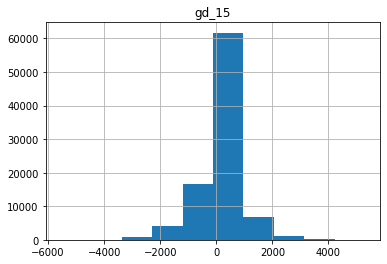

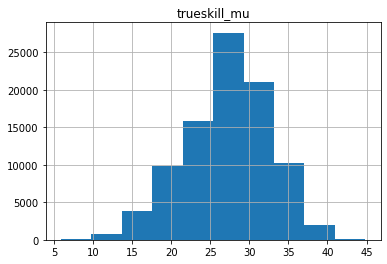

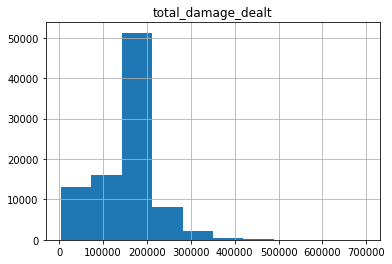

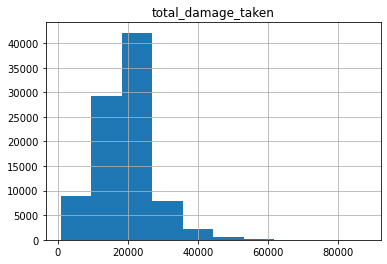

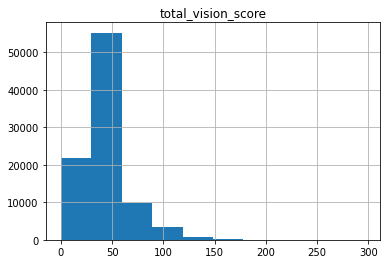

In [191]:
#check the data for outliers -> check which scaler would be best (standard, MinMax, Robust, etc
df_normalized_BLUE.hist(null_data_BLUE.keys()[1])
df_normalized_BLUE.hist(null_data_BLUE.keys()[4])
df_normalized_BLUE.hist(null_data_BLUE.keys()[6])
df_normalized_BLUE.hist(null_data_BLUE.keys()[7])
df_normalized_BLUE.hist(null_data_BLUE.keys()[8])

array([[<AxesSubplot:title={'center':'total_gold'}>]], dtype=object)

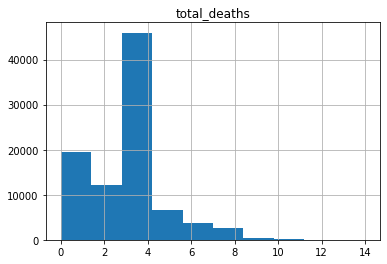

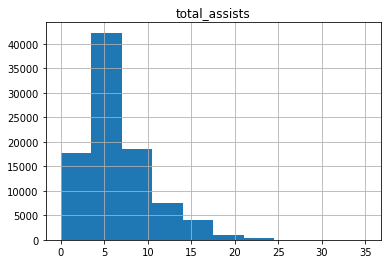

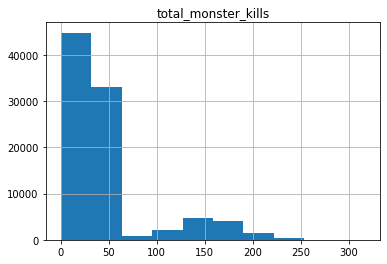

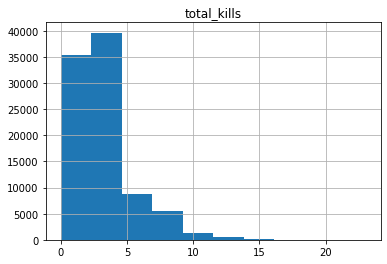

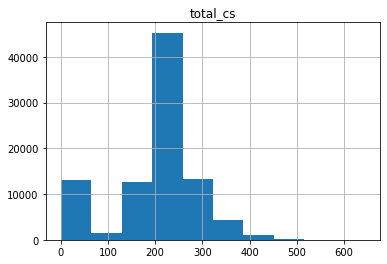

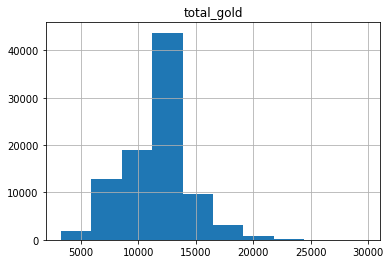

In [194]:
df_normalized_BLUE.hist(null_data_BLUE.keys()[9])
df_normalized_BLUE.hist(null_data_BLUE.keys()[10])
df_normalized_BLUE.hist(null_data_BLUE.keys()[11])
df_normalized_BLUE.hist(null_data_BLUE.keys()[12])
df_normalized_BLUE.hist(null_data_BLUE.keys()[13])
df_normalized_BLUE.hist(null_data_BLUE.keys()[14])

In [201]:
df_normalized_BLUE.columns

Index(['champion_id', 'gd_15', 'kills_assists_15', 'deaths_15',
       'gold_share_post_15', 'damage_share', 'jungle_proximity',
       'support_proximity', 'total_gold', 'total_cs', 'total_kills',
       'total_monster_kills', 'total_assists', 'total_deaths',
       'total_vision_score', 'total_damage_taken', 'total_damage_dealt',
       'trueskill_sigma', 'trueskill_mu', 'win', 'index_teams'],
      dtype='object')

In [202]:
#Scale the data using MinMax Scaler! Not sensible to outliers
from sklearn.preprocessing import MinMaxScaler 

for col in df_normalized_BLUE.columns:
    if col != 'champion_id'
    scaler = MinMaxScaler()
    scaler.fit(df_normalized_BLUE[row])
    #imputer.fit(df_normalized_BLUE[[feature]])
    #        df_normalized_BLUE[[feature]] = imputer.transform(df_normalized_BLUE[[feature]])
    #        print(f'{i} {feature} null values were replaced with {imputer.statistics_}')


#scaler.transform(data)

champion_id
gd_15
kills_assists_15
deaths_15
gold_share_post_15
damage_share
jungle_proximity
support_proximity
total_gold
total_cs
total_kills
total_monster_kills
total_assists
total_deaths
total_vision_score
total_damage_taken
total_damage_dealt
trueskill_sigma
trueskill_mu
win
index_teams


# ML model just considering players individually

Use the df_normalize_BLUE(RED) for and easy ML model -> not include the teams or the champion composition